In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
card=pd.read_csv("cc_data.csv")

In [ ]:
card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
card.shape

(8950, 18)

In [ ]:
card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
card["CREDIT_LIMIT"].isnull().value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Name: CREDIT_LIMIT, Length: 8950, dtype: bool>

In [ ]:
print (card['CREDIT_LIMIT'].describe())

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64


In [ ]:
card[card['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [ ]:
card.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
card['CREDIT_LIMIT'].fillna(card['CREDIT_LIMIT'].median(),inplace=True)
card['MINIMUM_PAYMENTS'].fillna(card['MINIMUM_PAYMENTS'].median(),inplace=True)
print (card.isnull().sum())


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [ ]:
card['Monthly_avg_purchase']=card['PURCHASES']/card['TENURE']
card['Monthly_cash_advance']=card['CASH_ADVANCE']/card['TENURE']

In [ ]:
card['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [ ]:
card['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

In [ ]:
card[card['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

In [ ]:
card.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(20)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


In [ ]:
card[(card['ONEOFF_PURCHASES']==0) & (card['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [ ]:
card[(card['ONEOFF_PURCHASES']>0) & (card['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [ ]:
card[(card['ONEOFF_PURCHASES']>0) & (card['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [ ]:
card[(card['ONEOFF_PURCHASES']==0) & (card['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

In [ ]:
def purchase(card):   
    if (card['ONEOFF_PURCHASES']==0) & (card['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (card['ONEOFF_PURCHASES']>0) & (card['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (card['ONEOFF_PURCHASES']>0) & (card['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (card['ONEOFF_PURCHASES']==0) & (card['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [ ]:
card['purchase_type']=card.apply(purchase,axis=1)

In [ ]:
card['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [ ]:
card['limit_usage']=card.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [ ]:
card['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [ ]:
card['payment_minpay']=card.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)
card['payment_minpay'].describe()

count    8950.000000
mean        9.059164
std       118.180526
min         0.000000
25%         0.913275
50%         2.032717
75%         6.052729
max      6840.528861
Name: payment_minpay, dtype: float64

In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
credit_log=card.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [ ]:
credit_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [ ]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
credit_pre=credit_log[[x for x in credit_log.columns if x not in col ]]

In [ ]:
x=card.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

TypeError: ignored

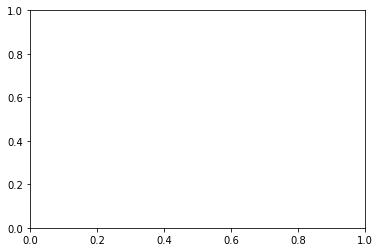

In [ ]:
fig,ax=plt.subplots()
ax.bar(bottom=range(len(x)),width=x.values())
ax.set(yticks= np.arange(len(x)),yticklabels=x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

In [ ]:
card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


In [ ]:
card[card['purchase_type']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay


Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

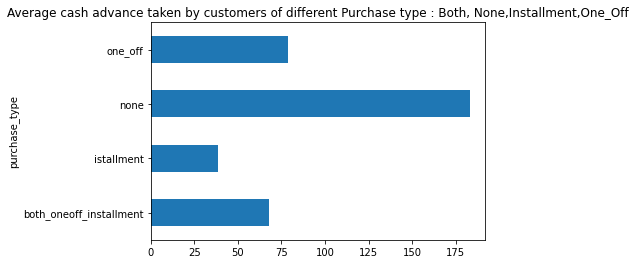

In [ ]:
card.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

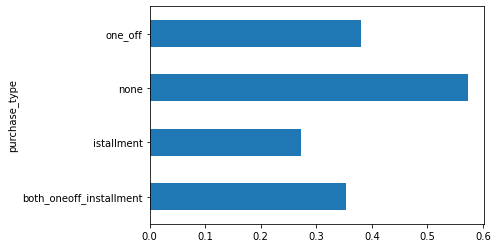

In [ ]:
card.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

In [ ]:
credit_original=pd.concat([card,pd.get_dummies(card['purchase_type'])],axis=1)

In [ ]:
credit_pre['purchase_type']=card.loc[:,'purchase_type']
pd.get_dummies(credit_pre['purchase_type']).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
credit_dummy=pd.concat([credit_pre,pd.get_dummies(credit_pre['purchase_type'])],axis=1)

In [ ]:
l=['purchase_type']

In [ ]:
credit_dummy=credit_dummy.drop(l,axis=1)
credit_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_avg_purchase                0
Monthly_cash_advance                0
limit_usage                         0
payment_minpay                      0
both_oneoff_installment             0
istallment                          0
none                                0
one_off                             0
dtype: int64

In [ ]:
credit_dummy.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment,istallment,none,one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600,0.309944,0.252514,0.228156,0.209385
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817,0.000000,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459,0.000000,0.000000,0.000000,0.000000
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415,1.000000,1.000000,0.000000,0.000000
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767,1.000000,1.000000,1.000000,1.000000


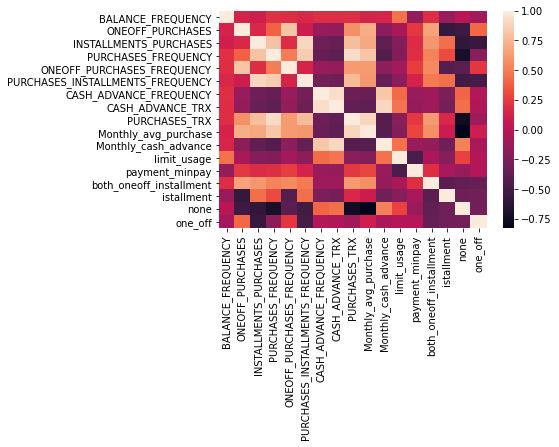

In [ ]:
sns.heatmap(credit_dummy.corr())

In [ ]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
credit_scaled=sc.fit_transform(credit_dummy)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
var_ratio={}
for n in range(4,15):
    pc=PCA(n_components=n)
    credit_pca=pc.fit(credit_scaled)
    var_ratio[n]=sum(credit_pca.explained_variance_ratio_)

In [ ]:
pc=PCA(n_components=5)

In [ ]:
p=pc.fit(credit_scaled)

In [ ]:
credit_scaled.shape

(8950, 17)

In [ ]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ])

In [ ]:
var_ratio

{4: 0.8115442762351261,
 5: 0.8770555795291425,
 6: 0.9186492443512623,
 7: 0.9410925256030132,
 8: 0.9616114053683054,
 9: 0.9739787081990642,
 10: 0.9835896584630701,
 11: 0.9897248107341962,
 12: 0.9927550009135224,
 13: 0.9953907562385422,
 14: 0.9979616898169594}

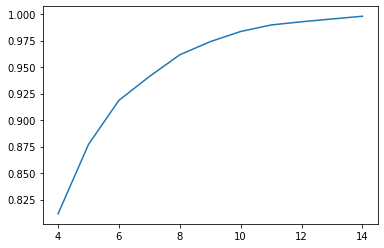

In [ ]:
pd.Series(var_ratio).plot()

In [ ]:
pc_final=PCA(n_components=5).fit(credit_scaled)
reduced_credit=pc_final.fit_transform(credit_scaled)

In [ ]:
dd=pd.DataFrame(reduced_credit)

In [ ]:
dd.shape

(8950, 5)

In [ ]:
col_list=credit_dummy.columns

In [ ]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'istallment', 'none', 'one_off'],
      dtype='object')

In [ ]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


In [ ]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
dtype: float64

In [ ]:
type(credit_pca)

sklearn.decomposition._pca.PCA

In [ ]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_credit)
km_4.labels_

array([1, 3, 2, ..., 1, 3, 2], dtype=int32)

In [ ]:
pd.Series(km_4.labels_).value_counts()

0    2758
1    2228
3    2090
2    1874
dtype: int64

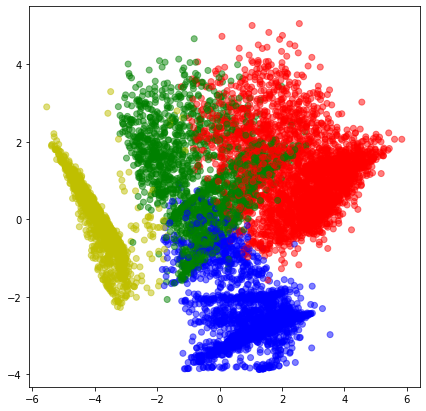

In [ ]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_credit[:,0],reduced_credit[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [ ]:
credit_dummy.dtypes

BALANCE_FREQUENCY                   float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
limit_usage                         float64
payment_minpay                      float64
both_oneoff_installment               uint8
istallment                            uint8
none                                  uint8
one_off                               uint8
dtype: object

In [ ]:
df_pair_plot=pd.DataFrame(reduced_credit,columns=['PC_' +str(i) for i in range(5)])

In [ ]:
df_pair_plot['Cluster']=km_4.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


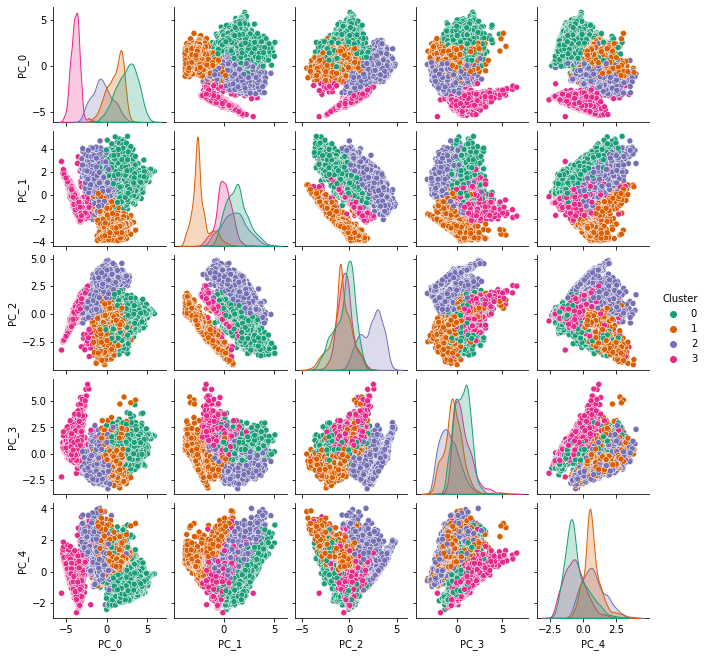

In [ ]:
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [ ]:
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','istallment','one_off','none','CREDIT_LIMIT']

In [ ]:
credit_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [ ]:
cluster_df_4=pd.concat([credit_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [ ]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,istallment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,1
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,3
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,2
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,2
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,2


In [ ]:
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,33.125453,12.053860,7.118997,0.045933
Monthly_avg_purchase,193.696083,47.573598,69.758276,0.159337
Monthly_cash_advance,67.620006,33.489846,77.843485,186.298043
limit_usage,0.354487,0.264275,0.378727,0.576217
CASH_ADVANCE_TRX,2.807107,1.019300,2.864995,6.552632
payment_minpay,7.268605,13.402660,5.561421,9.927979
both_oneoff_installment,1.000000,0.001795,0.003735,0.002392
istallment,0.000000,0.998205,0.000000,0.017225
one_off,0.000000,0.000000,0.996265,0.003349
none,0.000000,0.000000,0.000000,0.977033


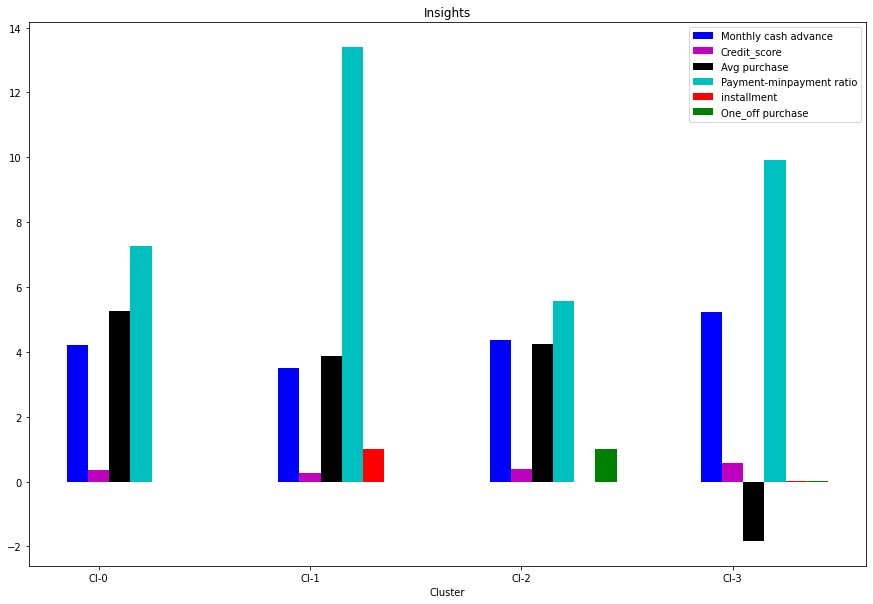

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()